# Learning From Data HW04

# 1

Not going to attempt solving VC inequality for N since it looks like a Ne^N expression which is not solvable analytically.

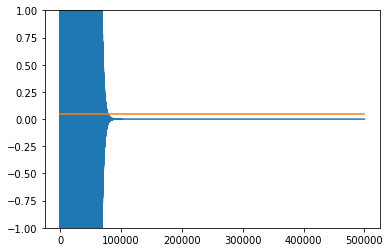

In [10]:
import numpy as np
import matplotlib.pyplot as plt

dVC = 10
eps = 0.05
desired_confidence = 0.95

def mH(N):
    return N**dVC

N = np.arange(dVC*10, 500000)
conf = 4*mH(2*N)*np.exp(-1.0/8 * eps*eps*N)

plt.plot(N, conf)
plt.plot([0, 500000], [0.05, 0.05])
plt.ylim([-1, 1])
plt.show()

Answer above seems really wrong. How can that function become negative? Let's try again, but being a bit smarter and simplifying the expression more to avoid numerical issues.

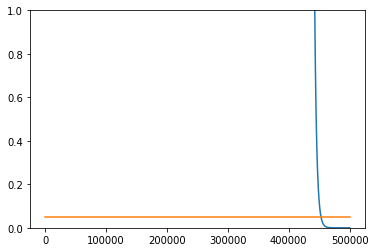

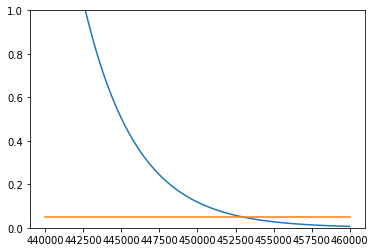

In [17]:
import numpy as np
import matplotlib.pyplot as plt

dVC = 10
eps = 0.05
desired_confidence = 0.95

def mH(N):
    return N**dVC

N = np.arange(dVC*10, 500000)
conf = 4*np.exp(dVC*np.log(2*N) - 1/8 * eps*eps*N)

plt.plot(N, conf)
plt.plot([0, 500000], [0.05, 0.05])
plt.ylim([0, 1])
plt.show()

N = np.arange(440000, 460000)
conf = 4*np.exp(dVC*np.log(2*N) - 1/8 * eps*eps*N)

plt.plot(N, conf)
plt.plot([440000, 460000], [0.05, 0.05])
plt.ylim([0, 1])
plt.show()

Now we're getting somewhere. Error in last exercise was probably due to NumPy using some kind of integer type that wrapped around to negative numbers when getting too large. Simplifying the expression did the trick and prevented numerical issues.

The closest alternative is 460000 **alternative D**.

# 2

Plotting is pretty straightforward when forcing dtype=np.float64 and solving the implicit expressions for $\epsilon$, except for Devroye, which has a problematic $m_{\mathcal H}(N^2)$ part. This number is so huge that it overflows 64-bit floating point numbers, so we will have to simplify.

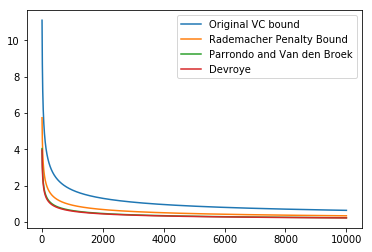

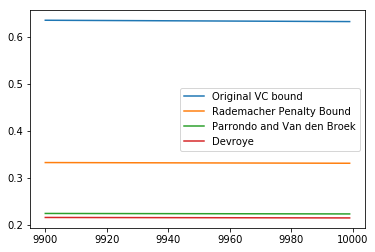

In [36]:


delta = 0.05

dVC = 50

def original(N):
    return np.sqrt(8/N * np.log(4*mH(2*N)/delta))

def rademacher(N):
    return np.sqrt(2*np.log(2*N*mH(N))/N) + np.sqrt(2/N*np.log(1/delta)) + 1/N

def parrondo(N):
    # Solve implicit expression for epsilon using quadratic formula
    return 1/N + 0.5*np.sqrt(4/N**2 + 4/N * np.log(6*mH(2*N)/delta))

def devroye(N):
    # Solve implicit expression for epsilon using quadratic formula
    # Need to fix so that numbers fit in float64
    #return (2/N + np.sqrt(4/N**2 + 4*(1-2/N)*(1/(2*N))*np.log(4*mH(N**2)/delta)))/(2*(1-2/N))
    return (2/N + np.sqrt(4/N**2 + 4*(1-2/N)*(1/(2*N))*(np.log(4) + 2*dVC*np.log(N) - np.log(delta))))/(2*(1-2/N))

N = np.arange(10, 10000, dtype=np.float64)
plt.plot(N, original(N))
plt.plot(N, rademacher(N))
plt.plot(N, parrondo(N))
plt.plot(N, devroye(N))

plt.legend([
    "Original VC bound",
    "Rademacher Penalty Bound",
    "Parrondo and Van den Broek",
    "Devroye",
])
plt.show()

N = np.arange(9900, 10000, dtype=np.float64)
plt.plot(N, original(N))
plt.plot(N, rademacher(N))
plt.plot(N, parrondo(N))
plt.plot(N, devroye(N))

plt.legend([
    "Original VC bound",
    "Rademacher Penalty Bound",
    "Parrondo and Van den Broek",
    "Devroye",
])
plt.show()

Looks like the Devroye bound is the smallest for N=10000.

# 3

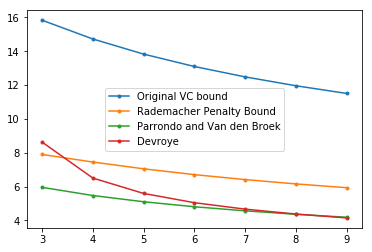

In [45]:
N = np.arange(3, 10, dtype=np.float64)
plt.plot(N, original(N), ".-")
plt.plot(N, rademacher(N), ".-")
plt.plot(N, parrondo(N), ".-")
plt.plot(N, devroye(N), ".-")

plt.legend([
    "Original VC bound",
    "Rademacher Penalty Bound",
    "Parrondo and Van den Broek",
    "Devroye",
])
plt.show()

For N=5, the Parrondo and Van den Broek bound is smallest. **Alternative C**

# Bias and Variance

# 4

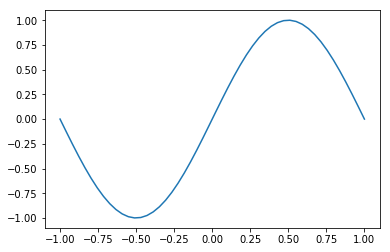

In [48]:
def f(x):
    return np.sin(np.pi*x)

x = np.linspace(-1, 1)
plt.plot(x, f(x))
plt.show()

Compute optimal $a$.

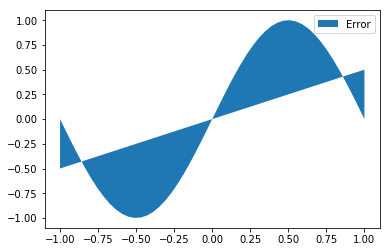

In [56]:
plt.fill_between(x, f(x), 0.5*x)
plt.legend(["Error"])
plt.show()

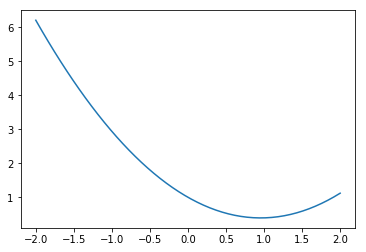

     fun: 0.39207289814597335
    nfev: 9
     nit: 5
 success: True
       x: 0.954929658551372


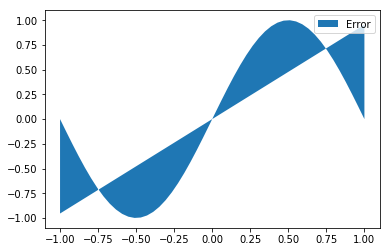

In [72]:
import scipy.integrate as integrate
import scipy

def error(a):
    return integrate.quad(lambda x: (f(x) - a*x)**2, -1, 1)[0]

errs = [error(a) for a in np.linspace(-2, 2)]
plt.plot(np.linspace(-2, 2), errs)
plt.show()

optim = scipy.optimize.minimize_scalar(error, bounds=(-2,2))
print(optim)

plt.fill_between(x, f(x), optim.x*x)
plt.legend(["Error"])
plt.show()

But a=0.95 doesn't correspond with any of the alternatives.

variance 0.23398881126747187
error 0.5002972378397086
ahat 1.4142992724548251


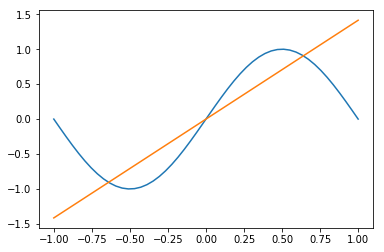

In [159]:
errors = []
aa = []
varss = []
for i in range(10000):
    x1 = np.random.rand()*2-1
    x2 = np.random.rand()*2-1
    X = np.array([[x1], [x2]])

    y1 = f(x1)
    y2 = f(x2)
    y = np.array([[y1], [y2]])

    a = np.linalg.solve(X.T @ X, X.T @ y)[0][0]
    var = scipy.integrate.quad(lambda x: (a*x-1.4286*x)**2, -1, 1)
    error = scipy.integrate.quad(lambda x: (a*x - f(x))**2, -1, 1)


    aa.append(a)
    varss.append(var)
    errors.append(error)
    
variance = np.mean(varss)
error = np.mean(errors)
print("variance", variance)
print("error", error)
    
ahat = np.mean(aa)
print("ahat", ahat)

plt.plot(x, f(x))
plt.plot(x, ahat*x)
plt.show()

We get a different $a$ here. Not equal to any of the alternatives. **Alternative E, none of the above**

# 5: Bias

In [161]:
ahat = 1.4286198403174335
expected_a = 0.954929658551372

bias = scipy.integrate.quad(lambda x: (ahat*x - f(x))**2, -1, 1)[0]/2
bias

0.27083057850684145

variance 0.2386780311559372
error 0.5083955286869504

and error=variance+bias.

so 0.5 ~= 0.2 + 0.3

bias = expected[(gbar(x) - f(x))^2]

variance = Expected_X [ Expected_D [ (gD(x) - ghat(x))^2 ] ]

**Alternative C**

# 6: Variance

Around 0.2 according the the above. **Alternative A**

# 7

In [255]:
# H0: b
# H1: ax
# H2: ax+b
# H3: ax^2
# H4: ax^2 + b

def f(X):
    return np.column_stack([
        np.sin(np.pi*X[:,1])
    ])

class H0:
    def transform(self, X):
        return X
    
    def fit(self, X, y):
        Z = self.transform(X)
        self.w = np.linalg.solve(Z.T @ Z, Z.T @ y)
        
    def predict(self, X):
        Z = self.transform(X)
        return Z @ self.w

class H1:
    def transform(self, X):
        Z = np.zeros((X.shape[0], X.shape[1]+1))
        Z[:,0] = X[:,0]
        Z[:,1] = X[:,1]
        Z[:,2] = X[:,2]**2
        return Z
    
    def fit(self, X, y):
        Z = self.transform(X)
        self.w = np.linalg.solve(Z.T @ Z, Z.T @ y)
        
    def predict(self, X):
        Z = self.transform(X)
        return Z @ self.w
    
def sample():
    sample_X = np.array([
        [1, np.random.rand()*2 - 1],
        [1, np.random.rand()*2 - 1],
    ])
    sample_y = f(sample_X)
    return sample_X, sample_y

def mean_error(model, samples):
    ses = []
    for i in range(samples):
        X, y = sample()
        model.fit(X, y)
        test_X = np.column_stack([np.ones(100), np.linspace(-1, 1, 100)])
        predicted_y = model.predict(test_X)
        actual_y = f(test_X)
        se = np.mean((actual_y - predicted_y)**2)/2
        ses.append(se)
    return np.mean(ses)

def expected_w(model, samples):
    ws = []
    for i in range(samples):
        X, y = sample()
        model.fit(X, y)
        print(model.w.shape)
        ws.append(model.w.copy())
        
    return np.mean(ws, axis=0)

model = H0()
mean_error(model, 1000)
expected_w(model, 100)


(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


array([[-0.04073194],
       [ 1.02972912]])